In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='cp1252')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [6]:
df.isnull().sum().sum()

np.int64(16648)

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 columns
df.drop(df.columns[[2,3,4]],axis=1,inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# renaming the column names

In [11]:
df.rename(columns={'v1': 'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.describe()

,target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
# converting target variable in numerics 0,1

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# check for null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# check for duplicates
df.duplicated().sum()

np.int64(403)

In [19]:
# remove duplicates
df.drop_duplicates(keep='first',inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.shape

(5169, 2)

## 2. EDA

In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

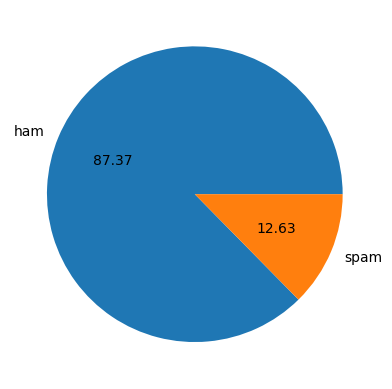

In [23]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [24]:
# imbalanced data

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NighatPC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\NighatPC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
df['num_characters'] = df['text'].apply(len)

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [35]:
df.iloc[:,2::].describe()
# df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

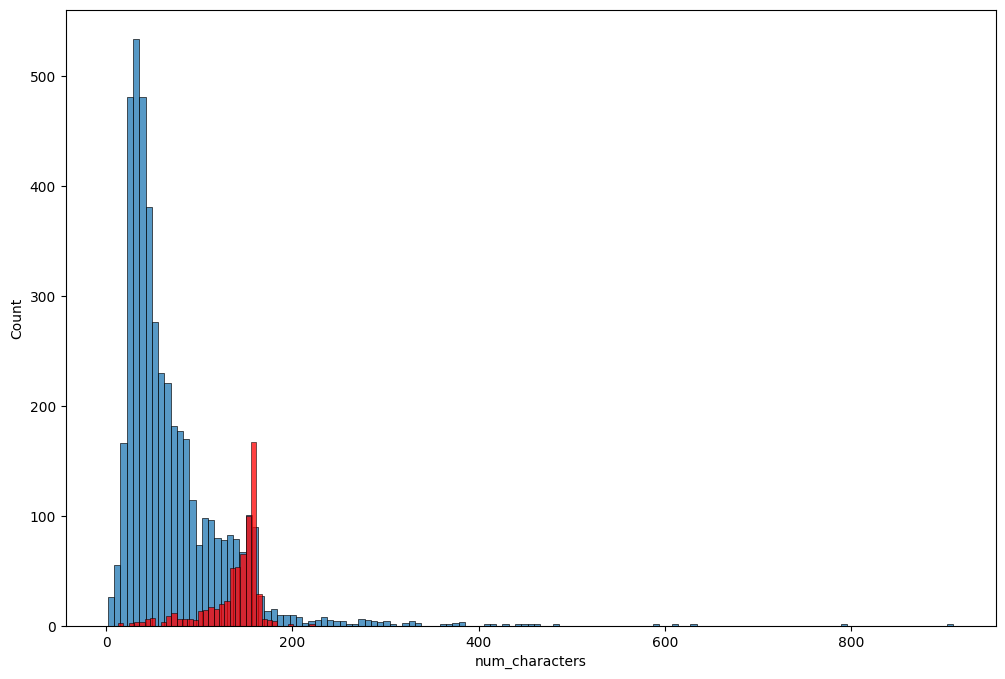

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

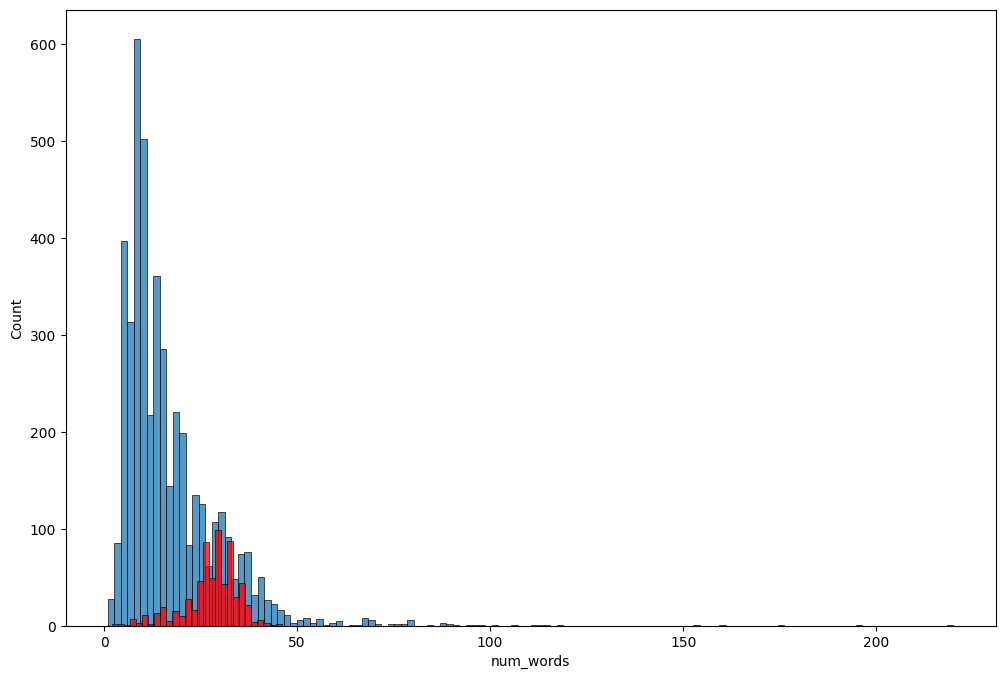

In [39]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

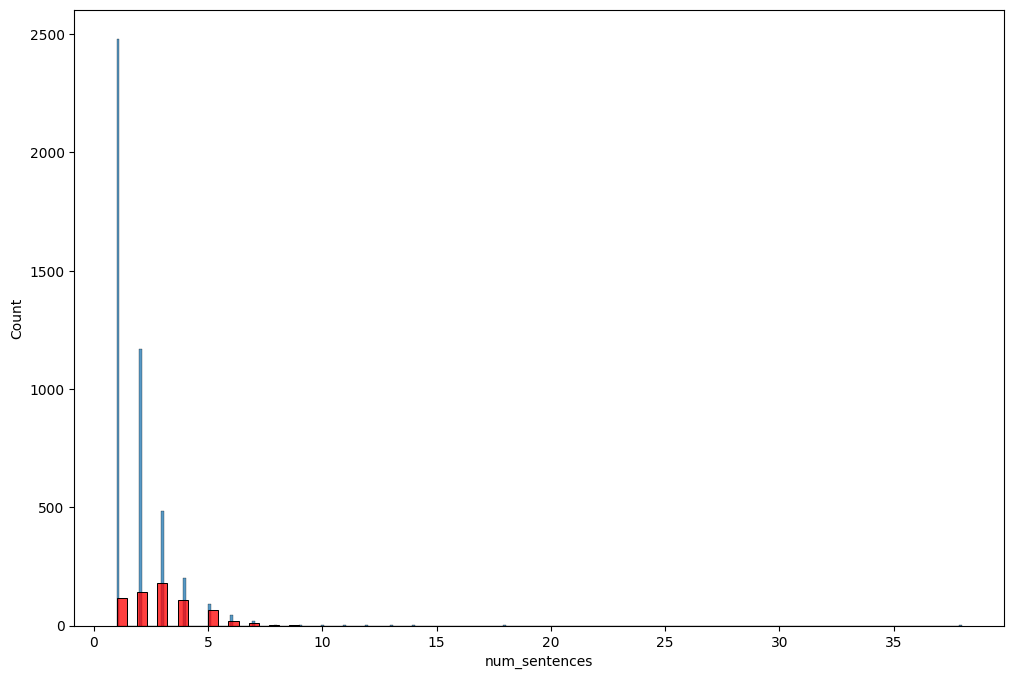

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

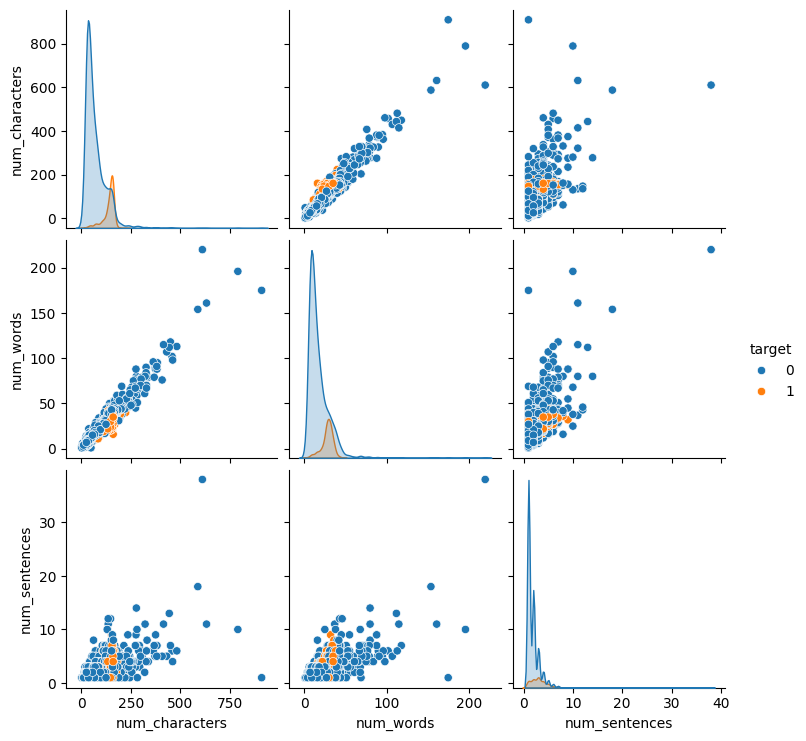

In [41]:
sns.pairplot(df,hue='target')

<Axes: >

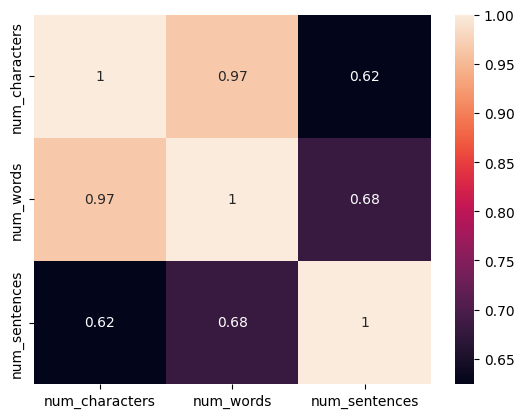

In [42]:
sns.heatmap(df.iloc[:,2::].corr(),annot=True)

## 3. Data Preprocessing

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NighatPC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from wordcloud import WordCloud
from collections import Counter

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y
    # y.clear()
    y = []
    for i in text:
        if i not  in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y
    y = []
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    # return y

In [46]:
transform_text("Hello! Who the H#ll is making noise?")

'hello h make nois'

In [47]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [48]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
ps.stem('dancing')

'danc'

In [51]:
ps.stem('eating')

'eat'

In [52]:
ps.stem('loving')

'love'

In [53]:
ps.stem('climbing')

'climb'

In [54]:
ps.stem('flying')

'fli'

In [55]:
df['transformed_text'] =  df['text'].apply(transform_text)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [58]:
# spam
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

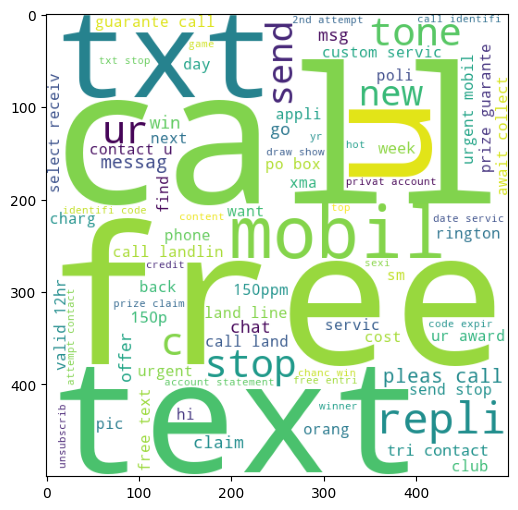

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [60]:
# ham
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

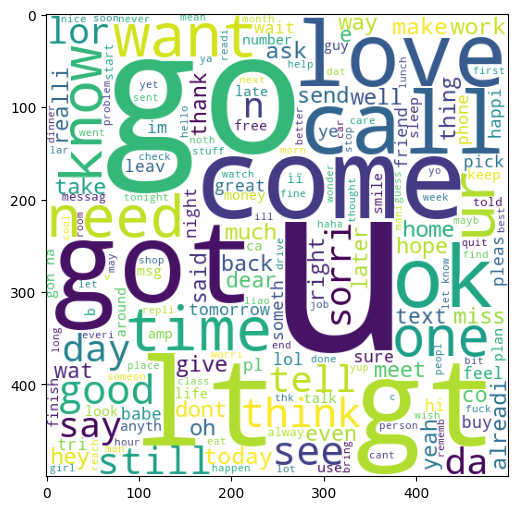

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [62]:
# top 30 words in spam messages
spam = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam.append(word)
print(len(spam))

9939


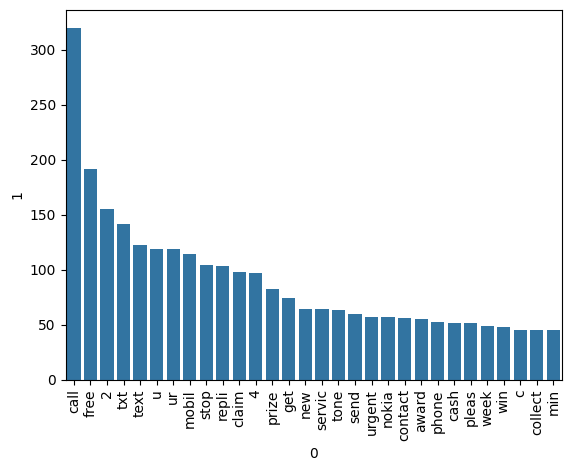

In [63]:
# spam
most_common_spam = pd.DataFrame(Counter(spam).most_common(30))
sns.barplot(x=most_common_spam[0],y=most_common_spam[1])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
# top 30 words in ham messages
ham = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham.append(word)
print(len(ham))

35404


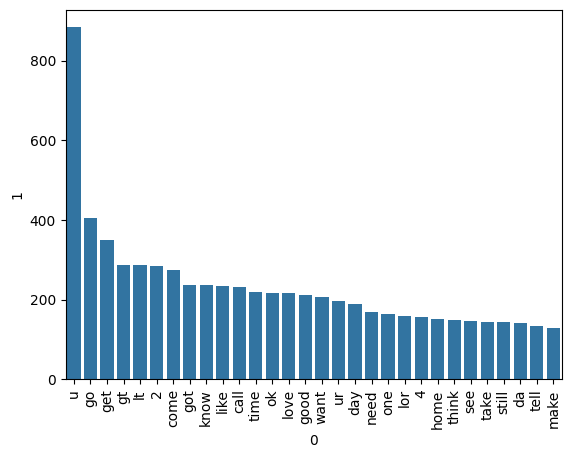

In [65]:
# ham
most_common_ham = pd.DataFrame(Counter(ham).most_common(30))
sns.barplot(x=most_common_ham[0],y=most_common_ham[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building and 5. Evaluation

In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [67]:
cv = CountVectorizer()

In [68]:
X = cv.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [69]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], shape=(6708,))

In [70]:
X.shape

(5169, 6708)

In [71]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
# gaussian
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred_gnb))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_gnb))
print("precision score:",precision_score(y_test,y_pred_gnb))

accuracy: 0.8800773694390716
confusion matrix:
 [[792 104]
 [ 20 118]]
precision score: 0.5315315315315315


In [74]:
# multinomial
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred_mnb))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_mnb))
print("precision score:",precision_score(y_test,y_pred_mnb))

accuracy: 0.9642166344294004
confusion matrix:
 [[871  25]
 [ 12 126]]
precision score: 0.8344370860927153


In [75]:
# bernoulli
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred_bnb))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_bnb))
print("precision score:",precision_score(y_test,y_pred_bnb))

accuracy: 0.9700193423597679
confusion matrix:
 [[893   3]
 [ 28 110]]
precision score: 0.9734513274336283


In [76]:
# changed 

In [77]:
tfidf = TfidfVectorizer()

In [78]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [79]:
y = df['target'].values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [81]:
# gaussian
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred_gnb))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_gnb))
print("precision score:",precision_score(y_test,y_pred_gnb))

accuracy: 0.8762088974854932
confusion matrix:
 [[793 103]
 [ 25 113]]
precision score: 0.5231481481481481


In [82]:
# multinomial
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred_mnb))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_mnb))
print("precision score:",precision_score(y_test,y_pred_mnb))

accuracy: 0.9593810444874274
confusion matrix:
 [[896   0]
 [ 42  96]]
precision score: 1.0


In [83]:
# bernoulli
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred_bnb))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_bnb))
print("precision score:",precision_score(y_test,y_pred_bnb))

accuracy: 0.9700193423597679
confusion matrix:
 [[893   3]
 [ 28 110]]
precision score: 0.9734513274336283


### Other Classification Models

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [85]:
lr = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [86]:
clfs = {
    'Logistic Regression': lr,
    'SVC': svc,
    'KNeighbors Classifier' : knc,
    'MultiNomial Naive Bayes':mnb,
    'Decision Tree Classifier' : dtc,
    'Random Forest Classifier' : rfc,
    'AdaBoost Classifier': abc,
    'Bagging Classifier': bc,
    'Extra Trees Classifier':etc,
    'Gradient Boosting Classifier':gbc,
    'XG Boost Classifier':xgb
}

In [87]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

In [88]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [89]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    acc,pre = train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(acc)
    precision_scores.append(pre)

In [90]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [91]:
performance_df

,Algorithm,Accuracy,Precision
10,XG Boost Classifier,0.974855,0.951613
1,SVC,0.972921,0.974138
8,Extra Trees Classifier,0.972921,0.982456
5,Random Forest Classifier,0.971954,1.000000
3,MultiNomial Naive Bayes,0.959381,1.000000
7,Bagging Classifier,0.958414,0.862595
9,Gradient Boosting Classifier,0.952611,0.923810
0,Logistic Regression,0.951644,0.940000
4,Decision Tree Classifier,0.936170,0.846154
6,AdaBoost Classifier,0.924565,0.840909


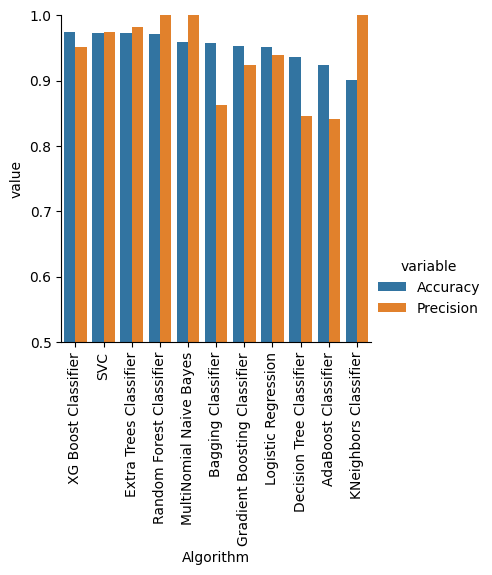

In [92]:
# performance_df1 = pd.melt(performance_df, id_vars='Algorithm')
performance_df1 = pd.melt(performance_df, id_vars=['Algorithm'], var_name='variable', value_name='value')
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1, kind='bar',height=4)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 6. Improving the model

### changed the parameter of tfidf

#### it resulted in increased accuracy

In [93]:
tfidf = TfidfVectorizer(max_features=3000)

In [94]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    acc,pre = train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(acc)
    precision_scores.append(pre)

In [95]:
performance_df_after_changing_tfidf = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy max ft 3000':accuracy_scores, 'Precision max ft 3000':precision_scores}).sort_values('Accuracy max ft 3000',ascending=False)

In [96]:
performance_df = performance_df.merge(performance_df_after_changing_tfidf, on='Algorithm')

### performed min max scaling
###### chosen min max scaling to convert value between 0 and 1
###### if standard scaling is done, values will be converted in negative values which is not accepteed by naive bayes

#### precision gets worse after scaling


In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    acc,pre = train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(acc)
    precision_scores.append(pre)

In [98]:
performance_df_after_scaling = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy scaling':accuracy_scores, 'Precision scaling':precision_scores}).sort_values('Accuracy scaling',ascending=False)

In [99]:
performance_df = performance_df.merge(performance_df_after_scaling, on='Algorithm')

In [100]:
performance_df

,Algorithm,Accuracy,Precision,Accuracy max ft 3000,Precision max ft 3000,Accuracy scaling,Precision scaling
0,XG Boost Classifier,0.974855,0.951613,0.967118,0.948276,0.967118,0.948276
1,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
2,Extra Trees Classifier,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
3,Random Forest Classifier,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
4,MultiNomial Naive Bayes,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
5,Bagging Classifier,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217
6,Gradient Boosting Classifier,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
7,Logistic Regression,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
8,Decision Tree Classifier,0.936170,0.846154,0.927466,0.811881,0.929400,0.828283
9,AdaBoost Classifier,0.924565,0.840909,0.924565,0.848837,0.924565,0.848837


### adding a column of number of characters in training

#### Accuracy getting worse

In [101]:
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [102]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [103]:
X.shape

(5169, 3001)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, zero_division=1)
    return accuracy, precision

accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    acc,pre = train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(acc)
    precision_scores.append(pre)

In [105]:
performance_df_with_num_characters= pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy with num characters':accuracy_scores, 'Precision with num characters':precision_scores}).sort_values('Accuracy with num characters',ascending=False)

In [106]:
performance_df = performance_df.merge(performance_df_with_num_characters, on='Algorithm')

### Voting Classifier using ensemble

###### combining the best performing models in equal weightage 
#### Precision getting worse

In [107]:
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [108]:
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [109]:
voting = VotingClassifier(estimators=[('mnb',mnb),('rf',rfc),('et',etc),('xgb',xgb)],voting='soft')

In [110]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enab...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [111]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred, zero_division=1))

Accuracy 0.9777562862669246
Precision 0.9914529914529915


### Stacking Classifier using ensemble

###### combining the best performing models in unequal weightage 
#### Accuracy getting worse

In [112]:
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [113]:
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import StackingClassifier

In [114]:
stacking = StackingClassifier(estimators=[('mnb',mnb),('rf',rfc),('et',etc),('xgb',xgb)],final_estimator=MultinomialNB())

In [115]:
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('mnb', MultinomialNB()),
                               ('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              en...
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=MultinomialNB())

In [116]:
y_pred = stacking.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred, zero_division=1))

Accuracy 0.8665377176015474
Precision 1.0


# FINAL

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score


df = pd.read_csv('spam.csv', encoding='cp1252')
df.drop(df.columns[[2,3,4]],axis=1,inplace=True)
df.rename(columns={'v1': 'target','v2':'text'},inplace=True)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

df.drop_duplicates(keep='first',inplace=True)

df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y
    # y.clear()
    y = []
    for i in text:
        if i not  in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y
    y = []
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    # return y

df['transformed_text'] =  df['text'].apply(transform_text)

In [130]:
tfidf = TfidfVectorizer(max_features=3000)

In [131]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [132]:
# multinomial
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred_mnb))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_mnb))
print("precision score:",precision_score(y_test,y_pred_mnb))

accuracy: 0.9709864603481625
confusion matrix:
 [[896   0]
 [ 30 108]]
precision score: 1.0


In [121]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [126]:
# rfc = RandomForestClassifier(n_estimators=50,random_state=2)
# rfc.fit(X_train,y_train)
# y_pred_rfc = rfc.predict(X_test)
# print("accuracy:",accuracy_score(y_test,y_pred_rfc))
# print("confusion matrix:\n",confusion_matrix(y_test,y_pred_rfc))
# print("precision score:",precision_score(y_test,y_pred_rfc))

accuracy: 0.9758220502901354
confusion matrix:
 [[894   2]
 [ 23 115]]
precision score: 0.9829059829059829


In [128]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(rfc,open('model.pkl','wb'))

In [122]:
performance_df

,Algorithm,Accuracy,Precision,Accuracy max ft 3000,Precision max ft 3000,Accuracy scaling,Precision scaling,Accuracy with num characters,Precision with num characters
0,XG Boost Classifier,0.974855,0.951613,0.967118,0.948276,0.967118,0.948276,0.970019,0.949580
1,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,1.000000
2,Extra Trees Classifier,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
3,Random Forest Classifier,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
4,MultiNomial Naive Bayes,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.941006,1.000000
5,Bagging Classifier,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225
6,Gradient Boosting Classifier,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.950677,0.930693
7,Logistic Regression,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.961315,0.962264
8,Decision Tree Classifier,0.936170,0.846154,0.927466,0.811881,0.929400,0.828283,0.945841,0.886792
9,AdaBoost Classifier,0.924565,0.840909,0.924565,0.848837,0.924565,0.848837,0.946809,0.902913
